<a href="https://colab.research.google.com/github/YuricgSilva/Manipulando_pixels_em_imagens_com_a_OpenCV/blob/main/Manipulando_pixels_em_imagens_com_a_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Import`s
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

ABRINDO UMA IMAGEM COLORIDA EM RGB, VISUALIZANDO E SALVANDO CADA UM DOS CANAIS DE CORES SEPARADAMENTE.


In [ ]:
cena01 = cv2.imread("/content/images/cena01.png")
img = cv2.cvtColor(cena01, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
#Extraindo canais de cores da imagem
# Canal Azul
R = img[:, :, 0]
# Canal Verde
G = img[:, :, 1]
# Canal Vermelho
B = img[:, :, 2]

In [ ]:
def _00B(img):
  _00B = img.copy()
  altura, largura, _ = _00B.shape
  for i in range(altura):
      for j in range(largura):
          _00B[i][j][0] = 0
          _00B[i][j][1] = 0
          _00B[i][j][2] = img[i][j][0]
  return _00B
def _0G0(img):
  _0G0 = img.copy()
  altura, largura, _ = _0G0.shape
  for i in range(altura):
      for j in range(largura):
          _0G0[i][j][0] = 0
          _0G0[i][j][1] = img[i][j][1]
          _0G0[i][j][2] = 0
  return _0G0
def _R00(img):
  _R00 = img.copy()
  altura, largura, _ = _R00.shape
  for i in range(altura):
      for j in range(largura):
          _R00[i][j][0] = img[i][j][2]
          _R00[i][j][1] = 0
          _R00[i][j][2] = 0
  return _R00

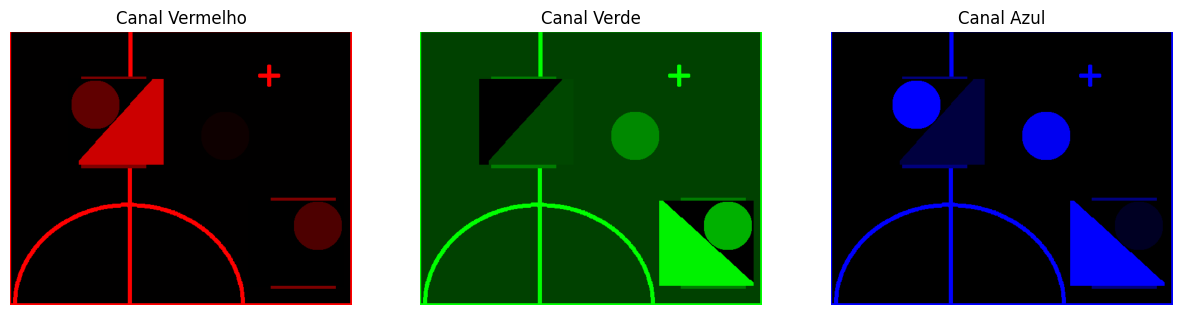

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

R = _R00(img)
G = _0G0(img)
B = _00B(img)

# Exibindo o canal azul
axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')

# Exibindo o canal verde
axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')

# Exibindo o canal vermelho
axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Vermelho')
axs[0].axis('off')

plt.show()

CONVERSÃO RGB PARA XYZ

In [ ]:
# Obter as dimensões da imagem
altura, largura, _ = img.shape

# Cirar imagens para guardar os canais X, Y, Z
img_X = np.zeros((altura, largura), dtype=np.float32)
img_Y = np.zeros((altura, largura), dtype=np.float32)
img_Z = np.zeros((altura, largura), dtype=np.float32)

# Matriz de conversão RGB para XYZ
rgb_to_xyz_matrix = np.array([[0.4124564, 0.3575761, 0.1804375],
                              [0.2126729, 0.7151522, 0.0721750],
                              [0.0193339, 0.1191920, 0.9503041]])

# Iterar sobre todos os pixels da imagem
for i in range(altura):
    for j in range(largura):
        # Pegar os valores de R, G, B
        R = img[i, j, 2]
        G = img[i, j, 1]
        B = img[i, j, 0]

        # Linearizar os valores de R, G, B (normalizando para [0, 1] e aplicando a correção de gama)
        R_linear = (R / 255.0) ** 2.2
        G_linear = (G / 255.0) ** 2.2
        B_linear = (B / 255.0) ** 2.2

        # Aplicar a matriz de conversão para calcular X, Y e Z
        X = (rgb_to_xyz_matrix[0, 0] * R_linear + rgb_to_xyz_matrix[0, 1] * G_linear + rgb_to_xyz_matrix[0, 2] * B_linear)
        Y = (rgb_to_xyz_matrix[1, 0] * R_linear + rgb_to_xyz_matrix[1, 1] * G_linear + rgb_to_xyz_matrix[1, 2] * B_linear)
        Z = (rgb_to_xyz_matrix[2, 0] * R_linear + rgb_to_xyz_matrix[2, 1] * G_linear + rgb_to_xyz_matrix[2, 2] * B_linear)

        # Armazenar os valores X, Y, Z nas imagens correspondentes
        img_X[i, j] = X * 255
        img_Y[i, j] = Y * 255
        img_Z[i, j] = Z * 255

In [ ]:
# Converter as imagens para uint8 (números inteiros) para visualização
img_X = np.uint8(img_X)
img_Y = np.uint8(img_Y)
img_Z = np.uint8(img_Z)
img_XYZ = cv2.merge((img_X, img_Y, img_Z))

img_concatenada = cv2.hconcat([img_X, img_Y, img_Z])
cv2_imshow(img_concatenada)
print("\nIMAGEM COM OS TRÊS CANAIS JUNTOS")
cv2_imshow(img_XYZ)

CONVERSÃO RGB PARA YUV

In [ ]:
# Obter as dimensões da imagem
altura, largura, _ = img.shape

# Cirar imagens para guardar os canais Y, U, V
img_Y = np.zeros((altura, largura), dtype=np.float32)
img_U = np.zeros((altura, largura), dtype=np.float32)
img_V = np.zeros((altura, largura), dtype=np.float32)

# Matriz de conversão RGB para YUV
rgb_to_yuv_matrix = np.array([[0.299, 0.587, 0.114],
                              [0.147, 0.289, 0.437],
                              [0.615, 0.515, 0.1]])

# Iterar sobre todos os pixels da imagem
for i in range(altura):
    for j in range(largura):
        # Pegar os valores de R, G, B
        R = img[i, j, 2] / 255.0
        G = img[i, j, 1] / 255.0
        B = img[i, j, 0] / 255.0

        # Aplicar a matriz de conversão para calcular Y, U e V
        Y = (rgb_to_yuv_matrix[0, 0] * R + rgb_to_yuv_matrix[0, 1] * G + rgb_to_yuv_matrix[0, 2] * B)
        U = ((-rgb_to_yuv_matrix[1, 0]) * R - rgb_to_yuv_matrix[1, 1] * G + rgb_to_yuv_matrix[1, 2] * B)
        V = (rgb_to_yuv_matrix[2, 0] * R - rgb_to_yuv_matrix[2, 1] * G - rgb_to_yuv_matrix[2, 2] * B)

        # Armazenar os valores X, Y, Z nas imagens correspondentes
        img_Y[i, j] = Y * 255
        img_U[i, j] = (U+0.5) * 255
        img_V[i, j] = (V+0.5) * 255

In [ ]:
# Converter as imagens para uint8 (números inteiros) para visualização
img_Y = np.uint8(img_Y)
img_U = np.uint8(img_U)
img_V = np.uint8(img_V)
img_YUV = cv2.merge((img_Y, img_U, img_V))

img_concatenada = cv2.hconcat([img_Y, img_U, img_V])
cv2_imshow(img_concatenada)
print("\nIMAGEM COM OS TRÊS CANAIS JUNTOS")
cv2_imshow(img_YUV)

CONVERSÃO RGB PARA YIQ

In [ ]:
  # Obter as dimensões da imagem
altura, largura, _ = img.shape

# Cirar imagens para guardar os canais Y, I, Q
img_Y = np.zeros((altura, largura), dtype=np.float32)
img_I = np.zeros((altura, largura), dtype=np.float32)
img_Q = np.zeros((altura, largura), dtype=np.float32)

# Matriz de conversão RGB para YIQ
rgb_to_yiq_matrix = np.array([[0.299, 0.587, 0.114],
                              [0.596, 0.275, 0.321],
                              [0.212, 0.523, 0.311]])

# Iterar sobre todos os pixels da imagem
for i in range(altura):
    for j in range(largura):
        # Pegar os valores de R, G, B
        R = img[i, j, 2] / 255.0
        G = img[i, j, 1] / 255.0
        B = img[i, j, 0] / 255.0

        # Aplicar a matriz de conversão para calcular Y, U e V
        Y = (rgb_to_yiq_matrix[0, 0] * R + rgb_to_yiq_matrix[0, 1] * G + rgb_to_yiq_matrix[0, 2] * B)
        I = (rgb_to_yiq_matrix[1, 0] * R - rgb_to_yiq_matrix[1, 1] * G - rgb_to_yiq_matrix[1, 2] * B)
        Q = (rgb_to_yiq_matrix[2, 0] * R - rgb_to_yiq_matrix[2, 1] * G + rgb_to_yiq_matrix[2, 2] * B)

        # Armazenar os valores Y, I, Q nas imagens correspondentes
        img_Y[i, j] = Y * 255
        img_I[i, j] = (I + 0.5957) * 255 / (2 * 0.5957)
        img_Q[i, j] = (Q + 0.5226) * 255 / (2 * 0.5226)

In [ ]:
# Converter as imagens para uint8 (números inteiros) para visualização
img_Y = np.uint8(img_Y)
img_I = np.uint8(img_I)
img_Q = np.uint8(img_Q)
img_YIQ = cv2.merge((img_Y, img_I, img_Q))

img_concatenada = cv2.hconcat([img_Y, img_I, img_Q])
cv2_imshow(img_concatenada)
print("\nIMAGEM COM OS TRÊS CANAIS JUNTOS")
cv2_imshow(img_YIQ)

CONVERSÃO RGB PARA CMY

In [ ]:
# Obter as dimensões da imagem
altura, largura, _ = img.shape

# Criar imagens para os canais C, M, Y
img_C = np.zeros((altura, largura), dtype=np.float32)
img_M = np.zeros((altura, largura), dtype=np.float32)
img_Y = np.zeros((altura, largura), dtype=np.float32)

# Iterar sobre todos os pixels
for i in range(altura):
    for j in range(largura):
        # Obter valores normalizados de R, G, B (de 0 a 1)
        R = img[i, j, 2] / 255.0
        G = img[i, j, 1] / 255.0
        B = img[i, j, 0] / 255.0

        # Converter para CMY
        C = 1 - R
        M = 1 - G
        Y = 1 - B

        # Armazenar os valores em escala 0–255
        img_C[i, j] = C * 255
        img_M[i, j] = M * 255
        img_Y[i, j] = Y * 255

In [ ]:
# Converter as imagens para uint8 (números inteiros) para visualização
img_C = np.uint8(img_C)
img_M = np.uint8(img_M)
img_Y = np.uint8(img_Y)
img_CMY = cv2.merge((img_C, img_M, img_Y))

img_concatenada = cv2.hconcat([img_C, img_M, img_Y])
cv2_imshow(img_concatenada)
print("\nIMAGEM COM OS TRÊS CANAIS JUNTOS")
cv2_imshow(img_CMY)

CONVERSÃO RGB PARA HSL

In [ ]:
# Obter as dimensões da imagem
altura, largura, _ = img.shape

# Criar imagens para os canais H, S, L
img_H = np.zeros((altura, largura), dtype=np.float32)
img_S = np.zeros((altura, largura), dtype=np.float32)
img_L = np.zeros((altura, largura), dtype=np.float32)

# Iterar sobre todos os pixels
for i in range(altura):
    for j in range(largura):
        # Obter valores normalizados de R, G, B (de 0 a 1)
        R = img[i, j, 2] / 255.0
        G = img[i, j, 1] / 255.0
        B = img[i, j, 0] / 255.0

        # Converter para HSL
        Cmax = max(R, G, B)
        Cmin = min(R, G, B)
        delta = Cmax - Cmin

        # Calcular L (luminosidade)
        L = (Cmax + Cmin) / 2

        # Calcular S (saturação)
        if delta == 0:
            S = 0
        else:
            S = delta / (1 - abs(2 * L - 1))

        # Calcular H (matiz)
        if delta == 0:
            H = 0
        elif Cmax == R:
            H = (60 * ((G - B) / delta) + 360) % 360
        elif Cmax == G:
            H = (60 * ((B - R) / delta) + 120) % 360
        else:
            H = (60 * ((R - G) / delta) + 240) % 360

        # Armazenar os valores H, S, L (H entre 0 e 360, S e L entre 0 e 1)
        img_H[i, j] = H
        img_S[i, j] = S * 255
        img_L[i, j] = L * 255

In [ ]:
img_H = np.uint8(img_H)
img_S = np.uint8(img_S)
img_L = np.uint8(img_L)
img_HSL = cv2.merge((img_H, img_S, img_L))

img_concatenada = cv2.hconcat([img_H, img_S, img_L])
cv2_imshow(img_concatenada)
print("\nIMAGEM COM OS TRÊS CANAIS JUNTOS")
cv2_imshow(img_HSL)

CONVERSÃO RGB PARA HSV

In [ ]:
# Obter as dimensões da imagem
altura, largura, _ = img.shape

# Criar imagens para os canais H, S, V
img_H = np.zeros((altura, largura), dtype=np.float32)
img_S = np.zeros((altura, largura), dtype=np.float32)
img_V = np.zeros((altura, largura), dtype=np.float32)

# Iterar sobre todos os pixels
for i in range(altura):
    for j in range(largura):
        # Normalizar os valores R, G, B
        R = img[i, j, 2] / 255.0
        G = img[i, j, 1] / 255.0
        B = img[i, j, 0] / 255.0

        Cmax = max(R, G, B)
        Cmin = min(R, G, B)
        delta = Cmax - Cmin

        # Calcular Hue (H)
        if delta == 0:
            H = 0
        elif Cmax == R:
            H = (60 * ((G - B) / delta)) % 360
        elif Cmax == G:
            H = (60 * ((B - R) / delta)) + 120
        else:  # Cmax == B
            H = (60 * ((R - G) / delta)) + 240

        # Calcular Saturation (S)
        if Cmax == 0:
            S = 0
        else:
            S = delta / Cmax

        # Calcular Value (V)
        V = Cmax

        # Armazenar os valores
        img_H[i, j] = H
        img_S[i, j] = S * 255
        img_V[i, j] = V * 255


In [ ]:
img_H = np.uint8(img_H)
img_S = np.uint8(img_S)
img_V = np.uint8(img_V)
img_HSV = cv2.merge((img_H, img_S, img_V))

img_concatenada = cv2.hconcat([img_H, img_S, img_V])
cv2_imshow(img_concatenada)
print("\nIMAGEM COM OS TRÊS CANAIS JUNTOS")
cv2_imshow(img_HSV)

POR MEIO DA FUNÇÃO PUTTEXT() DA OPENCV, ESCREVER O NOME DA COR DE CADA REGIÃO DA IMAGEM.

In [ ]:
# Parâmetros do texto
font       = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
thickness  = 2
color_txt  = (255, 255, 255)

# Lista com (texto, (x, y))
labels = [
    ('VERMELHO',      (120,  80)),
    ('AZUL',          (200, 160)),
    ('LARANJA',       (380, 160)),
    ('BRANCO',        (480,  60)),
    ('AMARELO',       (550, 320)),
    ('VERDE',         (470, 290)),
    ('CINZA',         ( 90,  65)),
    ('PRETO',         ( 90,  55)),
    ('VERDE ESCURO',  ( 50, 260)),
]

# Desenha cada rótulo apenas uma vez
used_colors = set()
for text, (x, y) in labels:
    if text in used_colors:
        continue
    cv2.putText(
        img, text,
        (x, y),
        font, font_scale,
        color_txt,
        thickness,
        cv2.LINE_AA
    )
    used_colors.add(text)

plt.imshow(img)


VISUALIZAR E SALVAR UMA SEGUNDA IMAGEM QUE TORNE PRETO O CAMPO (FUNDO VERDE) E SUAS MARCAÇÕES.

In [ ]:
semFundo = img.copy()

# Obter as dimensões da imagem
altura, largura, _ = img.shape
# Iterar sobre todos os pixels
for i in range(altura):
    for j in range(largura):
      if np.array_equal(img[i, j], [0, 65, 1]) or np.array_equal(img[i, j], [255, 255, 255]):
        semFundo[i, j, 0] = 0
        semFundo[i, j, 1] = 0
        semFundo[i, j, 2] = 0

plt.imshow(semFundo)
plt.imsave('semFundo.png', semFundo)

SALVAR TRÊS NOVAS IMAGENS: UMA COM AS DUAS ETIQUETAS DO ROBÔ DO TIME AMARELO SOMENTE (NOME DA IMAGEM: “AM02.PNG”), UMA COM AS DUAS ETIQUETAS DO ROBÔ DO TIME AZUL SOMENTE (NOME DA IMAGEM: “AZ03.PNG”) E UMA COM A BOLA LARANJA SOMENTE (NOME DA IMAGEM: “BOLA.PNG”).

In [ ]:
# Carregar a imagem
img = cv2.imread('/content/semFundo.png')

altura, largura, _ = img.shape

# Criar imagens vazias (preto)
azul_img = np.zeros_like(img)
amarelo_img = np.zeros_like(img)
bola_img = np.zeros_like(img)

# Iterar sobre cada pixel
for i in range(altura):
    for j in range(largura):
        B, G, R = img[i, j]

        if (R > 200 and G < 100 and B > 200) or (R < 150 and G < 150 and B > 180):
            azul_img[i, j] = img[i, j]

        elif (R > 200 and G > 200 and B < 100) or (R < 100 and G > 180 and B < 100):
            amarelo_img[i, j] = img[i, j]

        elif (R > 180 and G > 100 and G < 160 and B < 80):
            bola_img[i, j] = img[i, j]

# Salvar as imagens resultantes
cv2.imwrite('AZ03.PNG', azul_img)
cv2.imwrite('AM02.PNG', amarelo_img)
cv2.imwrite('BOLA.PNG', bola_img)

cv2_imshow(azul_img)
cv2_imshow(amarelo_img)
cv2_imshow(bola_img)